In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pylab as plt
import plot_analysis

import read_data
import trade_indicators
import trade_wallet
import trade_perforpance

## Read data

In [13]:
dict_read_data = {
    "interval":"1d", # Candles of 1 day
    "start_date": "2018-01-01"
                 }

In [3]:
df = read_data.fetch_btc_history(**dict_read_data)

## Compute indicators

In [18]:
dict_detect_trades = {
    "rolling_window":6, #Window width in candles of value weighted average price (VWAP)
    "threshold":0.03, #Fraction of deviation from reference metric. (VWAP)
                     }

In [39]:
df = trade_indicators.detect_all(df, **dict_detect_trades)

Reference metric: vwap - detection threshold: 0.03


## Update trades

In [25]:
dict_trade_logic = {"initial_investment":100,
                    "trade_fraction_cash":0.2, #Fraction of cash value traded
                    "trade_fraction_volume":0.2, #Fraction of unit volume traded
                   }

In [26]:
df = trade_wallet.make_trades(df, **dict_trade_logic)

## Stats
Number of trades (in candles)

In [36]:
dict_trade_map = {0:"No trade",
                 1:"Buy units",
                 -1:"Sell units",
                 }

In [38]:
df["direction"].map(dict_trade_map).value_counts()

direction
No trade      2022
Sell units     609
Buy units      466
Name: count, dtype: int64

## Make plots

#### Latest trades

In [40]:
df_sample = df.tail(200)

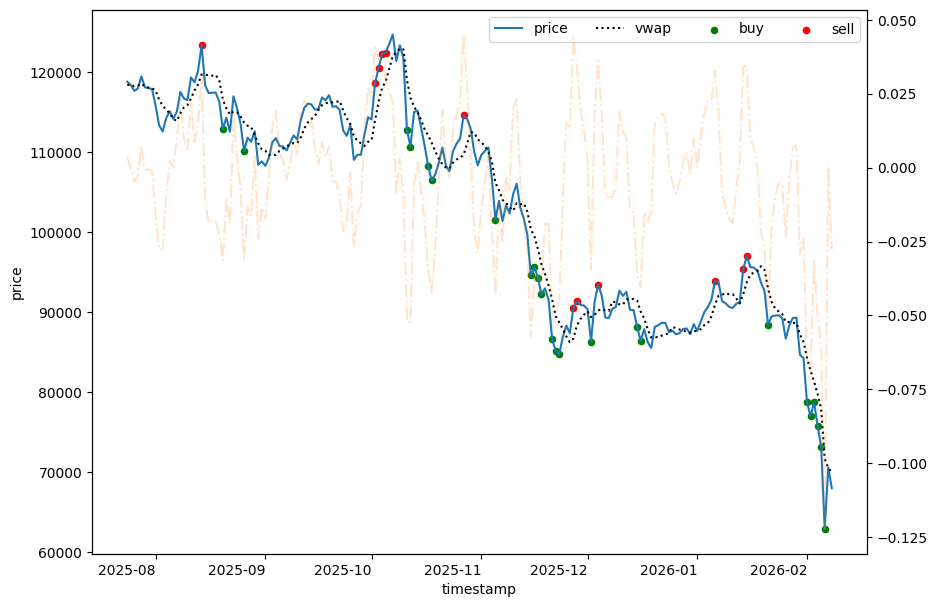

In [41]:
plot_analysis.plot_trade_events(df_sample)

## Wallet growth - Cash value and unit volume

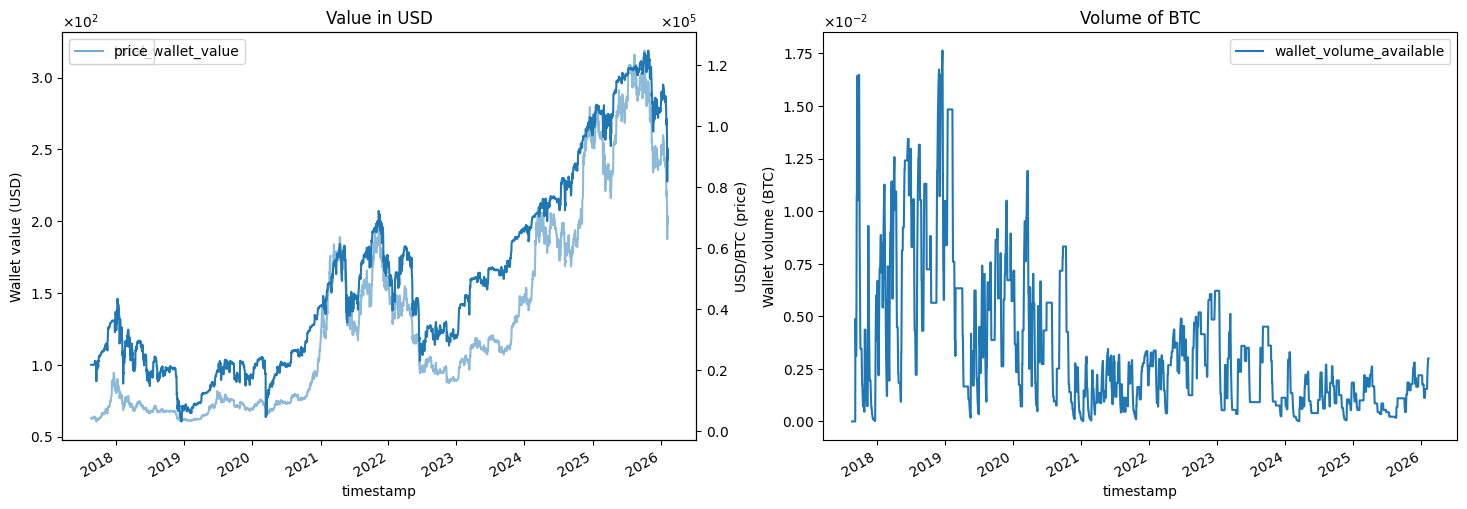

In [42]:
plot_analysis.plot_wallet_outcomes(df)

### Normalised wallet
Compare growth of initial investment

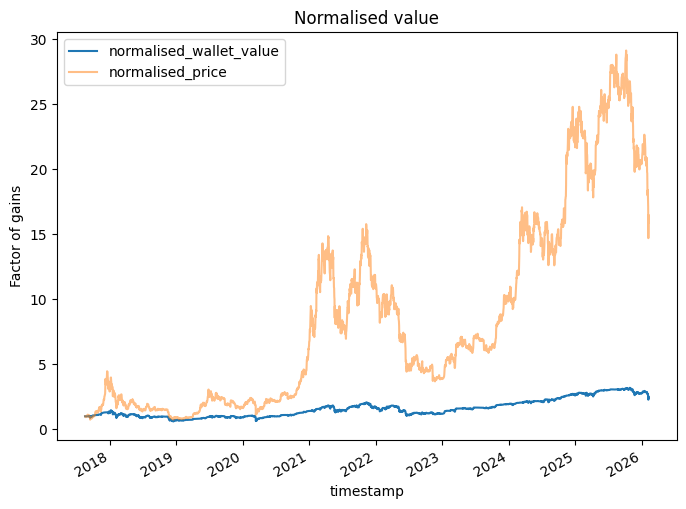

In [43]:
plot_analysis.plot_normalised_wallet(df)

array([[<Axes: title={'center': 'trade_value'}>]], dtype=object)

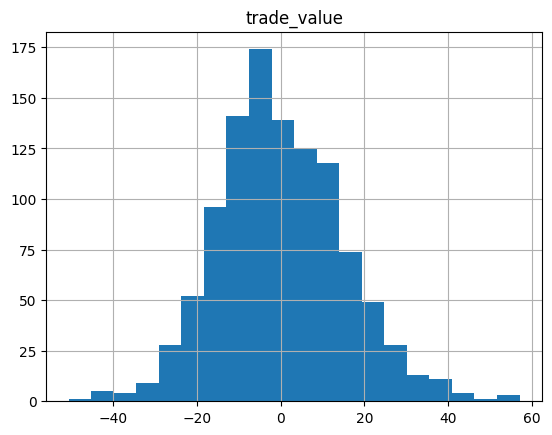

In [11]:
df.loc[df['signal'],['trade_value']].hist(bins=20)

## Fourier transform

In [12]:
# 5. Fourier analysis
price_series = df.set_index("timestamp")["price"]
returns = bb.detrend_series(price_series, method="log_return")

NameError: name 'bb' is not defined

In [ ]:
# 14-day rolling FFT on hourly data
fft_window = 24*7
dominant_cycles = bb.dominant_cycle(
    returns,
    window=fft_window,
    sampling_interval=1.0
)

In [ ]:
# Align output
cycle_df = pd.DataFrame({
    "timestamp": returns.index[fft_window:],
    "dominant_cycle_hours": dominant_cycles
})

In [ ]:
cycle_df.plot.scatter(x='timestamp',y='dominant_cycle_hours')
plt.ylim(0,5)

In [ ]:
cycle_df.mean()

In [ ]:
cycle_df['dominant_cycle_hours'].value_counts()

In [ ]:
import sys
sys.executable
